<span style="color:crimson; font-size:25px">Introduction</span>

In this part of the analysis, we will aim to find what other factors could have an impact on happiness aside from average wealth in a country.

Namely, we will be looking at 3 main factors: health (using life expectancy as a proxy), safety (using data from the World Bank), and peoples' perception of corruption in their country (public sector corruption index).

In this Notebook, we will assume you are already familiar with how we will do the analyses, so there will be less explanation on each step.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<span style="color:#4169e1; font-size:25px">Health and happiness</span>

**IMPORTANT:** We are using life expectancy as a proxy for health, which may not always be accurate as it's a measure of mortality, not health itself. It doesn't account for the quality of life in those extra years lived.

However, for now, it will be good enough of a proxy to use.


In [67]:
#Loading health data (life expectancy)
data = pd.read_csv("Data/Social Data.csv")
health_data = data[data["Indicator Name"] == "Life expectancy at birth, male (years)"][['Country', '2023']]
health_data.reset_index(drop=True,inplace=True)
health_data

,Country,2023
0,Aruba,73.702000
1,Africa Eastern and Southern,62.395547
2,Afghanistan,64.467000
3,Africa Western and Central,57.752356
4,Angola,62.099000
...,...,...
261,Kosovo,75.804000
262,"Yemen, Rep.",67.235000
263,South Africa,62.609000
264,Zambia,63.936000


In [68]:
#Important statistical data
health_data.describe()

,2023
count,265.000000
mean,70.919310
std,6.933547
min,53.195000
25%,66.067000
50%,70.800000
75%,75.800000
max,84.448000


In [69]:
#Loading happiness data
happiness_data = pd.read_csv("Data/WHR2023.csv")
happiness_data = happiness_data[['Country', 'Ladder Score']]
happiness_data

,Country,Ladder Score
0,Finland,7.804
1,Denmark,7.586
2,Iceland,7.530
3,Israel,7.473
4,Netherlands,7.403
...,...,...
132,Congo (Kinshasa),3.207
133,Zimbabwe,3.204
134,Sierra Leone,3.138
135,Lebanon,2.392


In [70]:
#Important statistical data on happiness scores
happiness_data.describe()

,Ladder Score
count,137.000000
mean,5.539796
std,1.139929
min,1.859000
25%,4.724000
50%,5.684000
75%,6.334000
max,7.804000


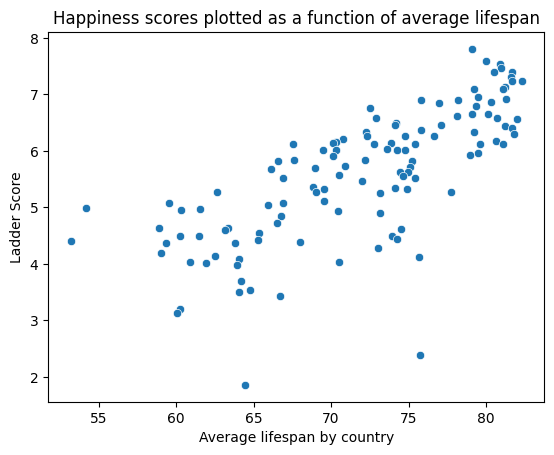

In [82]:
merged = happiness_data.merge(health_data, on='Country')
sns.scatterplot(data=merged, x = '2023', y = 'Ladder Score')
plt.xlabel('Average lifespan by country')
plt.title('Happiness scores plotted as a function of average lifespan')
plt.show()

In [72]:
merged[['2023', 'Ladder Score']].corr()

,2023,Ladder Score
2023,1.00000,0.73239
Ladder Score,0.73239,1.00000


<span style="color: #9333ea; font-size:25px">Interpretation</span>

Looking at the plot, we notice a strong positive linear correlation (**73%**) between happiness scores and health.

Notably, we notice the absence of extreme outliers like we did when looking at the relationship between happiness and GDP per capita, suggesting that perhaps health has a bigger impact on happiness than wealth.

Interestingly, it seems that the impact that health has on happiness is stronger than the impact wealth has, as we notice the absence of the **logarithmic** shape to the plot that we saw when analyzing wealth and happiness. This seems to imply that there is no diminishing returns for better health like there is for wealth.

<span style="color:#4169e1; font-size:25px">Safety and happiness</span>


In [73]:
safety_data = pd.read_csv("Data/Safety Data.csv")
safety_data = safety_data[safety_data["TYPE_LABEL"] == "Type: Value"][['Country','2024']]
safety_data.reset_index(drop=True, inplace=True)
safety_data

,Country,2024
0,Angola,5.341580
1,Albania,5.977521
2,United Arab Emirates,6.399651
3,Argentina,5.015093
4,Armenia,5.617255
...,...,...
118,"Venezuela, RB",3.705812
119,Viet Nam,6.193760
120,South Africa,3.974988
121,Zambia,5.215008


In [74]:
happiness_data2024 = pd.read_csv("Data/WHR2024.csv")
happiness_data2024 =  happiness_data2024[['Country', 'Ladder Score']]
happiness_data2024

,Country,Ladder Score
0,Finland,7.741
1,Denmark,7.583
2,Iceland,7.525
3,Sweden,7.344
4,Israel,7.341
...,...,...
138,Congo (Kinshasa),3.295
139,Sierra Leone,3.245
140,Lesotho,3.186
141,Lebanon,2.707


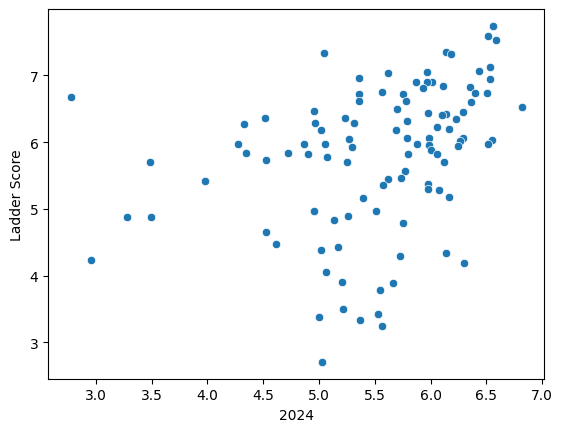

In [ ]:
merged2 = happiness_data2024.merge(safety_data, on='Country')
sns.scatterplot(data=merged2, x = '2024', y = 'Ladder Score')
plt.xlabel('Safety score')
plt.title("Happiness scores plotted as a function of safety")
plt.show()

In [76]:
merged2[['Ladder Score','2024']].corr()

,Ladder Score,2024
Ladder Score,1.000000,0.339904
2024,0.339904,1.000000


<span style="color:#9333ea; font-size:25px">Interpretation</span>

Surprisingly, it doesn't seem like there's any clear correlation between safety and happiness, given the seemingly randomly placement of the points on the scatter plot and the weak correlation value (**33.9%**).

One possible explanation for this is that once a basic threshold of safety is met, other social and psychological factors play a much larger role in determining well-being, and that the countries in the dataset are countries that have already passed this basic threshold of safety. In other words, **safety does not appear to be a major driver of cross-country differences in happiness.**

Another possible explanation is the existance of a flaw contained within the dataset: limited variation of safety scores or uneven sampling across countries.

<span style="color:#4169e1; font-size:25px">Corruption and happiness</span>

**Important note:** The data in the corruption dataset is scored from 0 (low corruption) to 1 (high corruption).


In [77]:
corruption_data = pd.read_csv("Data/Corruption Data.csv")
corruption_data = corruption_data[['Country','2023']]
corruption_data

,Country,2023
0,Afghanistan,0.494
1,Angola,0.472
2,Albania,0.632
3,United Arab Emirates,0.120
4,Argentina,0.491
...,...,...
170,Kosovo,0.301
171,"Yemen, Rep.",0.874
172,South Africa,0.640
173,Zambia,0.483


In [78]:
merged3 = corruption_data.merge(happiness_data, on='Country')
merged3.describe()

,2023,Ladder Score
count,121.000000,121.000000
mean,0.426231,5.581471
std,0.303026,1.168831
min,0.005000,1.859000
25%,0.136000,4.638000
50%,0.460000,5.738000
75%,0.706000,6.405000
max,0.968000,7.804000


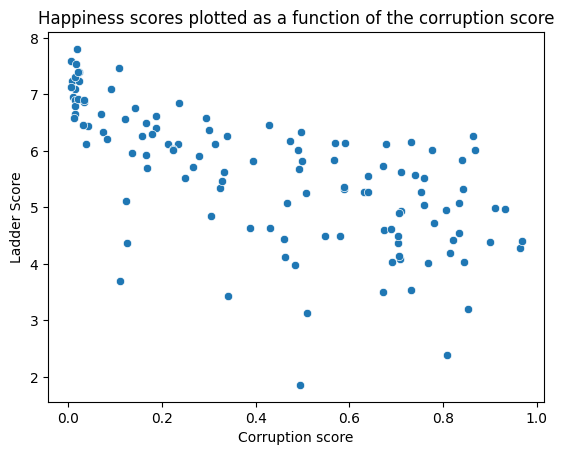

In [ ]:
sns.scatterplot(merged3,x='2023',y='Ladder Score')
plt.xlabel("Corruption score")
plt.title("Happiness scores plotted as a function of the corruption score")
plt.show()

In [80]:
merged3[['Ladder Score', '2023']].corr()

,Ladder Score,2023
Ladder Score,1.000000,-0.656652
2023,-0.656652,1.000000


<span style="color:#9333ea; font-size:25px">Interpretation</span>

The scatter plot indicates a strong negative relationship between corruption and happiness(**-65%**). In other words, as perceptions of corruption increase, reported happiness scores tend to decrease.

This negative correlation between corruption and happiness is almost as strong in magnitude as the positive correlation between wealth and happiness. This may imply that reducing corruption may lead to nearly the same well-being boost in countries as increasing wealth would.

The fact that corruption negatively impacts happiness to such a degree is likely due to the fact that it undermines key factors of well-being by ending people's trust in institutions (reducing social cohesion) and limiting fairness and opportunities which may make people feel powerless.

<span style="color:crimson; font-size:25px">General Conclusion</span>

After completing our analyses, we can rank the 4 factors we've analyzed based on their impacts on happiness as follows:

**1.Health**

**2.Wealth**

**3.Perceived rates of corruption**

**4.Safety**

However, there are some important caveats to keep in mind, the first of which is **our use of life expectancy as a proxy for health and GDP per capita as a proxy for wealth**. While these are generally good approximations and are widely accepted measures, they may lead to certain inaccuracies within the analysis. And we've already discussed this in more detail before.

Second, as was already mentioned before, there is always room for error or bias in these datasets (as with any large dataset), and these may lead to more inaccuracies. This might explain the surprising result we saw when analyzing safety and happiness.

Finally, it's important to recognize that these analyses aren't meant to provide the ultimate answer to "What makes us happy?", it's only meant to spark interest and promote discussion on such an important topic that is often overlooked.

